# Chat Wordcloud
___

In [1]:
import matplotlib
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import os

In [2]:
#config
%matplotlib inline

#constants
CHAT_DATA_DIRECTORY = '/home/marcel/Development/rbtvdata/chat'
STOPWORDS_GERMAN = ('ja', 'nein', 'aber', 'alle', 'allem', 'allen', 'aller', 'alles', 'als', 'also', 'am', 'an', 'ander', 'andere', 'anderem', 'anderen', 'anderer', 'anderes', 'anderm', 'andern', 'anders', 'auch', 'auf', 'aus', 'bei', 'bin', 'bis', 'bist', 'da', 'damit', 'dann', 'das', 'dass', 'dasselbe', 'dazu', 'daß', 'dein', 'deine', 'deinem', 'deinen', 'deiner', 'deines', 'dem', 'demselben', 'den', 'denn', 'denselben', 'der', 'derer', 'derselbe', 'derselben', 'des', 'desselben', 'dessen', 'dich', 'die', 'dies', 'diese', 'dieselbe', 'dieselben', 'diesem', 'diesen', 'dieser', 'dieses', 'dir', 'doch', 'dort', 'du', 'durch', 'ein', 'eine', 'einem', 'einen', 'einer', 'eines', 'einig', 'einige', 'einigem', 'einigen', 'einiger', 'einiges', 'einmal', 'er', 'es', 'etwas', 'euch', 'euer', 'eure', 'eurem', 'euren', 'eurer', 'eures', 'für', 'gegen', 'gewesen', 'hab', 'habe', 'haben', 'hat', 'hatte', 'hatten', 'hier', 'hin', 'hinter', 'ich', 'ihm', 'ihn', 'ihnen', 'ihr', 'ihre', 'ihrem', 'ihren', 'ihrer', 'ihres', 'im', 'in', 'indem', 'ins', 'ist', 'jede', 'jedem', 'jeden', 'jeder', 'jedes', 'jene', 'jenem', 'jenen', 'jener', 'jenes', 'jetzt', 'kann', 'kein', 'keine', 'keinem', 'keinen', 'keiner', 'keines', 'können', 'könnte', 'machen', 'man', 'manche', 'manchem', 'manchen', 'mancher', 'manches', 'mein', 'meine', 'meinem', 'meinen', 'meiner', 'meines', 'mich', 'mir', 'mit', 'muss', 'musste', 'nach', 'nicht', 'nichts', 'noch', 'nun', 'nur', 'ob', 'oder', 'ohne', 'sehr', 'sein', 'seine', 'seinem', 'seinen', 'seiner', 'seines', 'selbst', 'sich', 'sie', 'sind', 'so', 'solche', 'solchem', 'solchen', 'solcher', 'solches', 'soll', 'sollte', 'sondern', 'sonst', 'um', 'und', 'uns', 'unse', 'unsem', 'unsen', 'unser', 'unses', 'unter', 'viel', 'vom', 'von', 'vor', 'war', 'waren', 'warst', 'was', 'weg', 'weil', 'weiter', 'welche', 'welchem', 'welchen', 'welcher', 'welches', 'wenn', 'werde', 'werden', 'wie', 'wieder', 'will', 'wir', 'wird', 'wirst', 'wo', 'wollen', 'wollte', 'während', 'würde', 'würden', 'zu', 'zum', 'zur', 'zwar', 'zwischen', 'über')

In [3]:
text = ''

#read chat files
exp = re.compile('\[(.+?)\] <(.+?)> (.+)?')
files = (os.listdir(CHAT_DATA_DIRECTORY))
for filename in files:
    if filename.endswith('.txt'):
        filepath = os.path.join(CHAT_DATA_DIRECTORY, filename)
        dateStr = filename.rstrip('.txt')
        
        #read file
        openfile = open(filepath)
        rawData = openfile.read()
        openfile.close()

        #process each chat message
        splitRawData = rawData.split('\n')
        for line in splitRawData:
            match = exp.match(line)
            if match is not None:
                message = str(match.group(3))
                text += ' ' + message

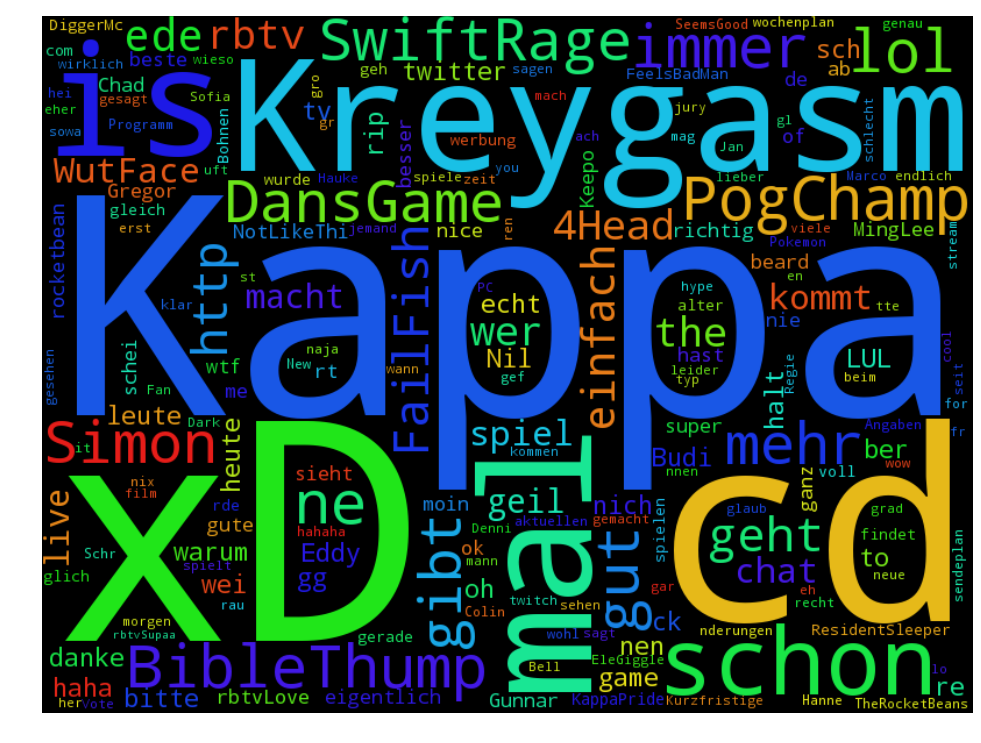

In [4]:
wordcloud = WordCloud(stopwords=STOPWORDS_GERMAN, background_color='black', width=800, height=600).generate(text)
plt.figure(figsize=(12,12))
plt.axis('off')
plt.imshow(wordcloud)